In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



demo_df = pd.read_csv("../data/clean/df_final_demo_cleaned.csv")
digital_df=pd.read_csv("../data/clean/df_final_web_data_cleaned.csv")
final_df=pd.read_csv("../data/clean/df_final_experiment_clients_cleaned.csv")
merged_df=pd.read_csv("../data/clean/merged_df_clean.csv")
merged_df.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0


In [2]:
#Who are the primary clients using this online process?

# primary clients are those participated in ab test
clients_participated_in_ab_test=pd.DataFrame(digital_df['client_id'].unique(),columns=['client_id'])
primary_clients=pd.merge(clients_participated_in_ab_test, demo_df, on='client_id',how='inner')
primary_clients.head(20)
primary_clients.to_csv('../data/clean/primary_clients.csv', index=False) 
#print(primary_clients)



In [3]:
#Are the primary clients younger or older, new or long-standing?
# Summary stats for primary clients
summary_primary = primary_clients[['clnt_age', 'clnt_tenure_yr']].describe()
print("\nPrimary Clients :\n", summary_primary)
print(primary_clients[['gendr']].value_counts())



Primary Clients :
            clnt_age  clnt_tenure_yr
count  70594.000000    70595.000000
mean      46.442240       12.052950
std       15.591273        6.871819
min       13.500000        2.000000
25%       32.500000        6.000000
50%       47.000000       11.000000
75%       59.000000       16.000000
max       96.000000       62.000000
gendr
U        24122
M        23724
F        22746
X            3
Name: count, dtype: int64


C:\Users\sheri\AppData\Local\Temp\ipykernel_24944\3632125455.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = primary_clients.groupby(['age_group', 'gendr']).size().unstack(fill_value=0)


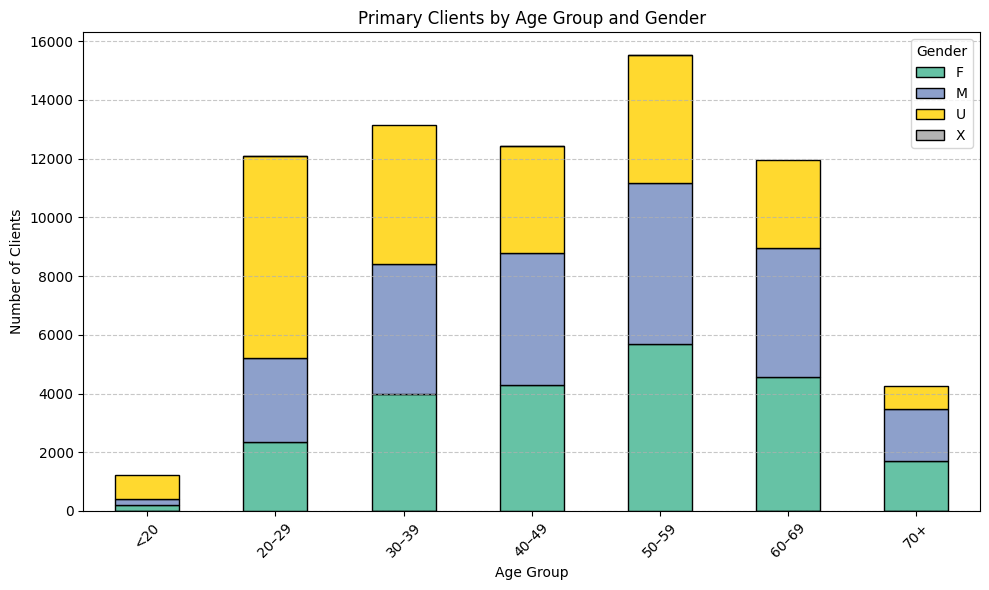

In [4]:

#Primary Client by Age Group and gender
# Step 1: Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['<20', '20–29', '30–39', '40–49', '50–59', '60–69', '70+']

# Step 2: Add 'age_group' column
primary_clients['age_group'] = pd.cut(primary_clients['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Step 3: Create a pivot table with counts for each gender per age group
age_gender_counts = primary_clients.groupby(['age_group', 'gendr']).size().unstack(fill_value=0)

# Optional: reorder columns if needed
age_gender_counts = age_gender_counts[['F', 'M', 'U', 'X']]  # reorder if necessary

# Step 4: Plot stacked bar chart
age_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', edgecolor='black')

plt.title('Primary Clients by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\sheri\AppData\Local\Temp\ipykernel_24944\730747377.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby(['tenure_group', 'age_group']).size().unstack(fill_value=0)


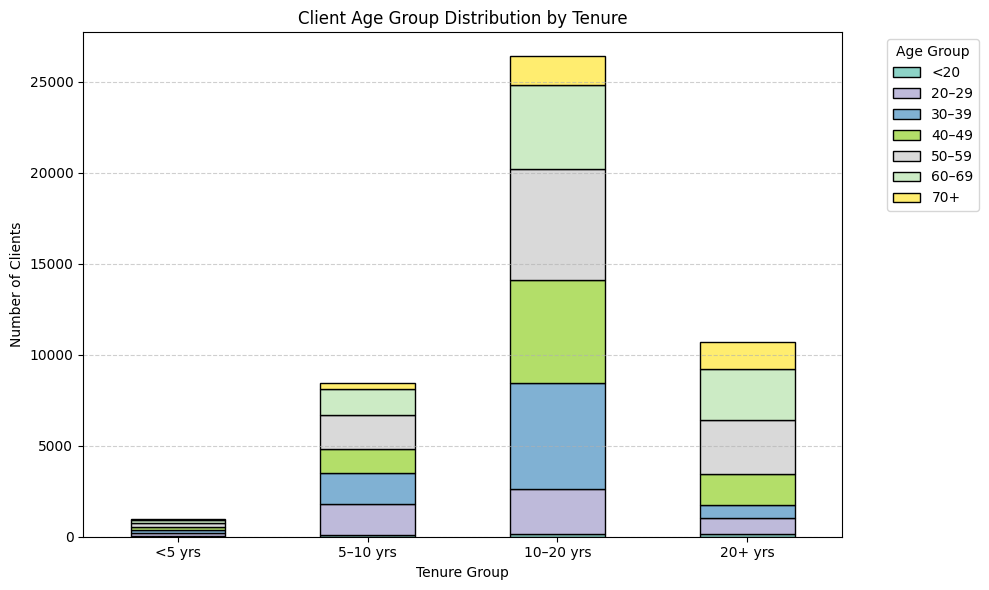

In [5]:

#Client Age group distribution by Tenure
# Step 1: Define age and tenure bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['<20', '20–29', '30–39', '40–49', '50–59', '60–69', '70+']
tenure_bins = [0, 5, 10, 20, 100]
tenure_labels = ['<5 yrs', '5–10 yrs', '10–20 yrs', '20+ yrs']

# Step 2: Add age_group and tenure_group
primary_clients['age_group'] = pd.cut(primary_clients['clnt_age'], bins=age_bins, labels=age_labels, right=False)
primary_clients['tenure_group'] = pd.cut(primary_clients['clnt_tenure_yr'], bins=tenure_bins, labels=tenure_labels, right=False)

# (Optional) Filter unknown genders
filtered_df = primary_clients[primary_clients['gendr'].isin(['F', 'M'])]

# Step 3: Create grouped counts
grouped = filtered_df.groupby(['tenure_group', 'age_group']).size().unstack(fill_value=0)

# Step 4: Plot as stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3', edgecolor='black')

# Step 5: Final formatting
plt.title('Client Age Group Distribution by Tenure')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [6]:

step_order = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
merged_df['steps'] = merged_df['process_step'].map(step_order)
df=merged_df
# Sort the data
df = df.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Create step transitions per visit
df['prev_step'] = df.groupby('visit_id')['steps'].shift(1)

#Identify backward transitions
def is_backward(curr, prev):
    return (prev >= curr) 

df['is_backward'] = df.apply(lambda row: is_backward(row['steps'], row['prev_step']), axis=1)

#Count backward transitions per client
backward_counts = df.groupby('client_id')['is_backward'].sum().rename('backward_count')

# Count total transitions per client (not rows — transitions)
# Each visit with N steps has (N-1) transitions
df['transition'] = df['prev_step'].notna()  # Only count rows that are part of a transition
transition_counts = df[df['transition']].groupby('client_id').size().rename('total_transitions')

#Combine and calculate error rate
result = pd.concat([backward_counts, transition_counts], axis=1).fillna(0)
result['error_rate'] = (result['backward_count'] / result['total_transitions']).fillna(0)

# Final result
result.shape

(50487, 3)

In [7]:
result.head(20)

,backward_count,total_transitions,error_rate
client_id,,,
555,0,4.0,0.000000
647,0,4.0,0.000000
934,3,3.0,1.000000
1028,4,8.0,0.500000
1104,0,0.0,0.000000
1186,0,2.0,0.000000
1195,0,4.0,0.000000
1197,1,6.0,0.166667
1336,1,5.0,0.200000


In [8]:

#  Add 'variation' and 'clnt_age'columns from merged_df 
client_info = merged_df[['client_id', 'clnt_age','Variation']]
result = result.merge(client_info, on='client_id', how='left').drop_duplicates(subset='client_id')
result.to_csv('../data/clean/result.csv', index=False) 

In [9]:
result.head(20)

,client_id,backward_count,total_transitions,error_rate,clnt_age,Variation
0,555,0,4.0,0.000000,29.5,Test
5,647,0,4.0,0.000000,57.5,Test
10,934,3,3.0,1.000000,51.0,Test
14,1028,4,8.0,0.500000,36.0,Control
23,1104,0,0.0,0.000000,48.0,Control
25,1186,0,2.0,0.000000,22.0,Control
29,1195,0,4.0,0.000000,54.5,Control
34,1197,1,6.0,0.166667,28.5,Control
41,1336,1,5.0,0.200000,42.0,Test
48,1346,4,9.0,0.444444,46.0,Test


In [10]:
average_error_by_variation = result.groupby('Variation')['error_rate'].mean().reset_index()
average_error_by_variation

,Variation,error_rate
0,Control,0.180162
1,Test,0.205607


In [11]:
# Creating age group
def age_group(age):
    if age < 30:
        return '0-30'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    elif age < 70:
        return '60-69'
    elif age < 80:
        return '70-79'
    else:
        return '80+'

result['age_group'] = result['clnt_age'].apply(age_group)


In [12]:

# Group by age group and variation, calculate avg error rate

grouped_error = result.groupby(['Variation', 'age_group'])['error_rate'].mean().reset_index()

grouped_error.to_csv('../data/clean/age_group_error.csv', index=False) 
grouped_error

,Variation,age_group,error_rate
0,Control,0-30,0.155590
1,Control,30-39,0.159404
2,Control,40-49,0.173101
3,Control,50-59,0.191237
4,Control,60-69,0.199602
5,Control,70-79,0.222008
6,Control,80+,0.247737
7,Test,0-30,0.165640
8,Test,30-39,0.178997
9,Test,40-49,0.191868


In [13]:
result.head(20)

,client_id,backward_count,total_transitions,error_rate,clnt_age,Variation,age_group
0,555,0,4.0,0.000000,29.5,Test,0-30
5,647,0,4.0,0.000000,57.5,Test,50-59
10,934,3,3.0,1.000000,51.0,Test,50-59
14,1028,4,8.0,0.500000,36.0,Control,30-39
23,1104,0,0.0,0.000000,48.0,Control,40-49
25,1186,0,2.0,0.000000,22.0,Control,0-30
29,1195,0,4.0,0.000000,54.5,Control,50-59
34,1197,1,6.0,0.166667,28.5,Control,0-30
41,1336,1,5.0,0.200000,42.0,Test,40-49
48,1346,4,9.0,0.444444,46.0,Test,40-49


C:\Users\sheri\AppData\Local\Temp\ipykernel_24944\3999245178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_error_by_variation, x='Variation', y='error_rate', palette='Set2')


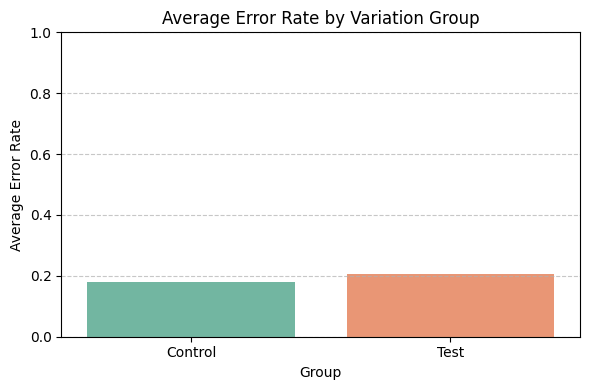

In [14]:
# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=average_error_by_variation, x='Variation', y='error_rate', palette='Set2')

plt.title('Average Error Rate by Variation Group')
plt.ylabel('Average Error Rate')
plt.xlabel('Group')
plt.ylim(0, 1)  # Adjust if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


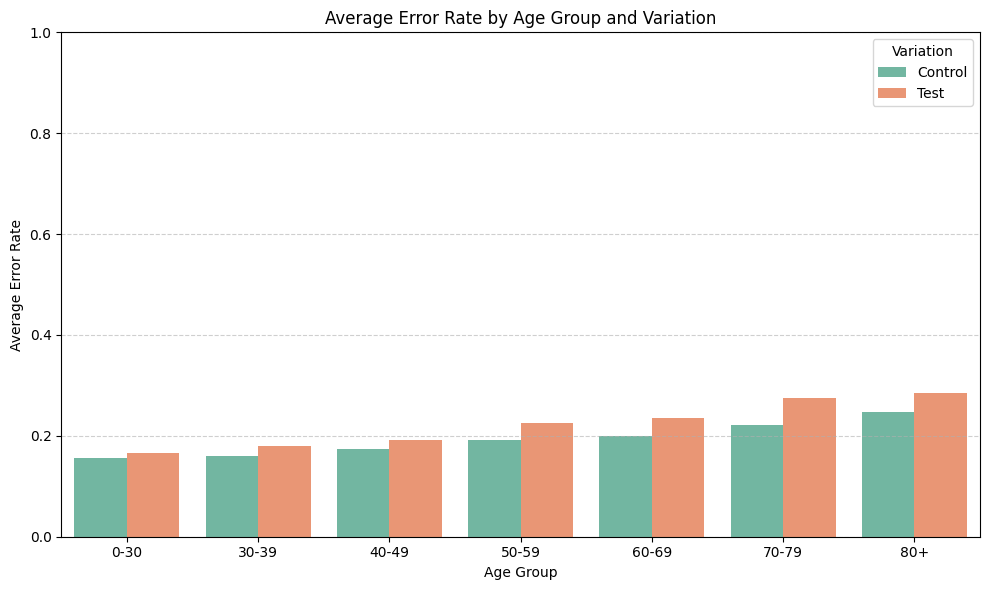

In [15]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_error, x='age_group', y='error_rate', hue='Variation', palette='Set2')

plt.title('Average Error Rate by Age Group and Variation')
plt.ylabel('Average Error Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)  # Scale for error rate
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Variation')

plt.tight_layout()
plt.show()


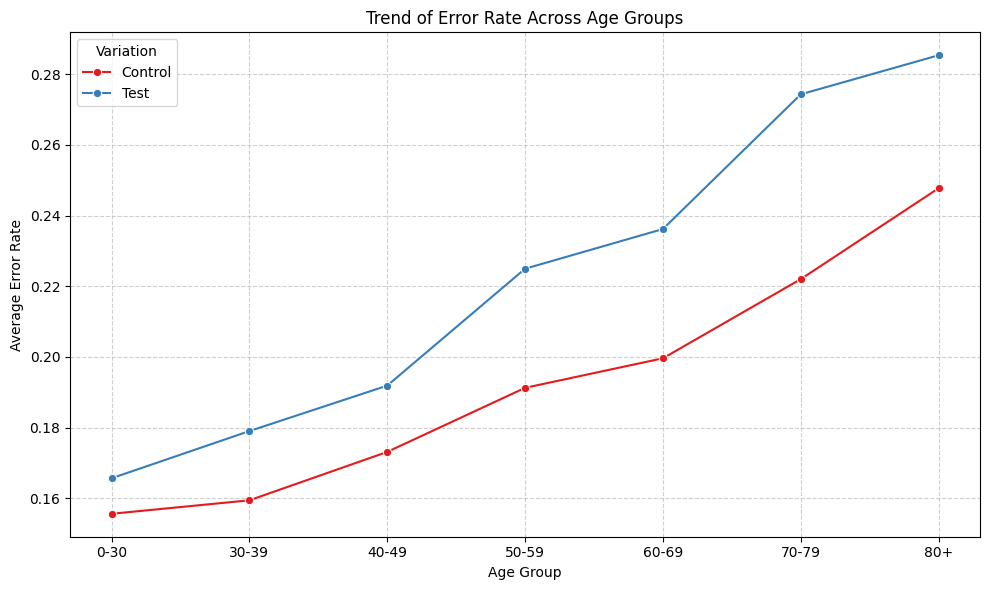

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_error, x='age_group', y='error_rate', hue='Variation', marker='o', palette='Set1')

plt.title('Trend of Error Rate Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Error Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [17]:

import scipy.stats as st
#hypothesis test-two sample t test
#Set the hypothesis
#H0: mu error rate Test Group<=mu error rate Control group
#H1: mu error rate Test Group>mu error rate Control group

alpha = 0.05

error_rate_test=result[result['Variation']=='Test']['error_rate']
error_rate_control=result[result['Variation']=='Control']['error_rate']
_,p_value=st.ttest_ind(error_rate_test,error_rate_control, equal_var=False, alternative="greater")
print(p_value)
if p_value > alpha:
    print("We are not able to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")


3.582099187583751e-28
We reject the null hypothesis.


In [18]:
#hypothesis test
#Set the hypothesis
#H0: mu error rate Age Group60-70<= mu error rate Age Group30-40
#H1: mu error rate Age Group 60-70 >mu error rate Age Group30-40

alpha = 0.05

error_rate_60=result[(result['clnt_age'])>60 &(result['clnt_age']<70)]['error_rate']
error_rate_30=result[(result['clnt_age']>30)&(result['clnt_age']<40)]['error_rate']
_,p_value=st.ttest_ind(error_rate_60,error_rate_30, equal_var=False, alternative="greater")
print(p_value)
if p_value > alpha:
    print("We are not able to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

1.2369310317752907e-22
We reject the null hypothesis.
